## Goals
In this lab you will:
- Utilize  the multiple variables routines developed in the previous lab
- run Gradient Descent on a data set with multiple features
- explore the impact of the *learning rate alpha* on gradient descent
- improve performance of gradient descent by *feature scaling* using z-score normalization

## Notation

The linear regression model is formulated as
$$f_{w, b}(x) = w x + b$$

Following is a summary of notation you will encounter

General notation | Description | Python (if applicable 
-----------------| ------------| --------------------- 
$a$ | scalar, non-bold |
$\mathbf{a}$ | vector, bold |
$\mathbf{x}$ | training examlpe feature values  | `x_train`
$\mathbf{y}$ | training example targets         | `y_train`
$x^{(i)}, y^{(i)}$    | $i^\mathrm{th}$ training example | `x_i`, `y_i`
$m$          | number of training examples      | `m`
$\mathbf{w}= (w_{1}, \ldots, w_{n})$ | parameter: weight | `w`
$b$          | parameter: bias   | `b`
$f_{\mathbf{w},b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by the weight $\mathbf{w}$ and the bias $b$ | `f_wb`

#  Problem Statement

As in the previous labs, you will use the motivating example of housing price prediction. The training data set contains many examples with 4 features (size, bedrooms, floors and age) shown in the table below. Note, in this lab, the Size feature is in sqft while earlier labs utilized 1000 sqft.  This data set is larger than the previous lab.

We would like to build a linear regression model using these values so we can then predict the price for other houses - say, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. 

##  Dataset: 
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |


In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("./data/houses.txt", delimiter=',', skiprows=1)
m = data.shape[0]
n = data.shape[1] - 1
X_train = data[:,:n]
y_train = data[:,-1]

# We name the features using a list of strings.
X_features = ['size (sqft)', 'bedrooms', 'floors', 'age']

# Examine the shape of the data
print(f"data shape: {data.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

data shape: (99, 5)
X_train shape: (99, 4)
y_train shape: (99,)


In [3]:
# import pandas as pd
# df = pd.read_csv('./data/concrete.csv', sep=',', header=0)
# data = df.values
# data.shape

After loading the data, we can view dataset and its features by plotting each feature versus the output values

Text(0, 0.5, 'Price (1000 GBPs)')

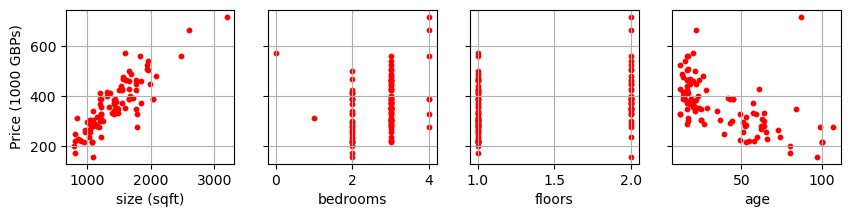

In [4]:
fig, ax = plt.subplots(1, n, figsize=(10, 2), sharey=True)
for i in range(n):
    ax[i].scatter(X_train[:,i], y_train, s=10, color='r')
    ax[i].set_xlabel(X_features[i])
    ax[i].grid(True)
ax[0].set_ylabel("Price (1000 GBPs)")

## Gradient Descent With Multiple Variables
Here are the equations you developed in the last lab on gradient descent for multiple variables.:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for } j = 0\ldots n-1\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, $n$ is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [5]:
from my_utilities import compute_cost, compute_grad

In [6]:
import copy
def gradient_descent(X, y, w_in, b_in, func_value, func_grad, alpha, num_iters, verbose=True): 
    """
    Perform batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for step in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = func_grad(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append(func_value(X, y, w, b))

        if verbose == True:
            # Print cost every at intervals 10 times or as many iterations if < 10
            if step% np.ceil(num_iters / 10) == 0:
                print(f"Iteration {step:4d}: Cost = {J_history[-1]:8.2f}")
        
    return w, b, J_history #return final w,b and J history for graphing

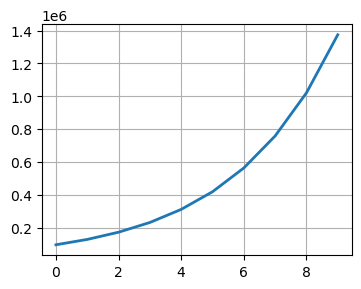

In [7]:
initial_w = np.zeros((n,))
initial_b = 0.0

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, \
                                            compute_cost, compute_grad, alpha=9.9e-7, num_iters=10, \
                                            verbose=False)

plt.figure(figsize=(4, 3))
plt.plot(J_hist, lw=2)
plt.grid(True)

It appears that the learning rate is too high although we have chosen it to be very small. The solution does not converge. Cost function is ***increasing*** rather than *decreasing*. Let's plot the result

Let us try a bit smaller learning rate. For now, we try to use two learning rate values $\alpha_1 = 9\times 10^{-7}$ and $\alpha_{2} = 10^{-7}$. The results will be plotted.

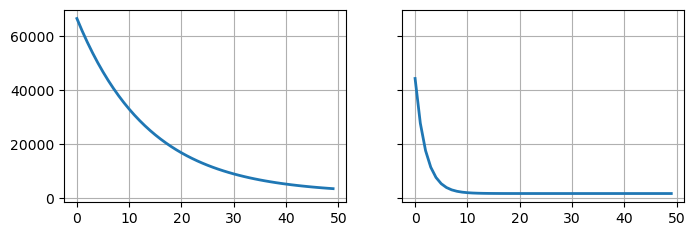

In [8]:
_, _, J_hist1 = gradient_descent(X_train, y_train, initial_w, initial_b, \
                                 compute_cost, compute_grad, \
                                 alpha=9.0e-7, num_iters=50, verbose=False)

_, _, J_hist2 = gradient_descent(X_train, y_train, initial_w, initial_b, \
                                 compute_cost, compute_grad, \
                                 alpha=1.0e-7, num_iters=50, verbose=False)

fig, ax = plt.subplots(1, 2, figsize=(8, 2.5), sharey=True)
ax[0].plot(J_hist1, lw=2)
ax[0].grid(True)
ax[1].plot(J_hist2, lw=2)
ax[1].grid(True)

## Feature Scaling 
The lectures described the importance of rescaling the dataset so the features have a similar range.
If you are interested in the details of why this is the case, click on the 'details' header below. If not, the section below will walk through an implementation of how to do feature scaling.

### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature $j$.
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new $x$ value (living room area and number of bed-
rooms), we must first normalize $x$ using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [9]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
# check our work
# from sklearn.preprocessing import scale
# scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

Let's look at the steps involved in Z-score normalization. The plot below shows the transformation step by step.

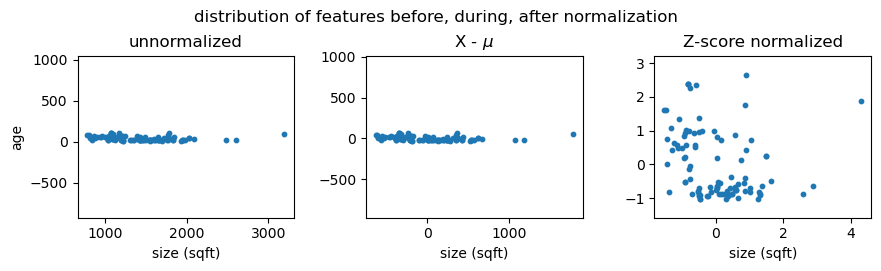

In [10]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(9, 2.8))
ax[0].scatter(X_train[:,0], X_train[:,3], s=10)
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3], s=10)
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3], s=10)
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

The plot above shows the relationship between two of the training set parameters, "age" and "size(sqft)". *These are plotted with equal scale*. 
- Left: Unnormalized: The range of values or the variance of the 'size(sqft)' feature is much larger than that of age
- Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size(sqft)' is clearly around zero.
- Right: The second step divides by the variance. This leaves both features centered at zero with a similar scale.

In [11]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], 
X_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


The peak to peak range of each column is reduced from a factor of thousands to a factor of 2-3 by normalization.

In [ ]:
w_norm, b_norm, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b, 
                                          compute_cost, compute_grad, alpha=1e-1, num_iters=1000, verbose=True)
print(f"w_norm = {w_norm}")
print(f"b_norm = {b_norm}")

Iteration    0: Cost = 57617.03
Iteration  100: Cost =   221.09
Iteration  200: Cost =   219.21
Iteration  300: Cost =   219.21
Iteration  400: Cost =   219.21
Iteration  500: Cost =   219.21
Iteration  600: Cost =   219.21
Iteration  700: Cost =   219.21
Iteration  800: Cost =   219.21
Iteration  900: Cost =   219.21
w_norm = [110.56039756 -21.26715096 -32.70718139 -37.97015909]
b_norm = 363.15608080808056


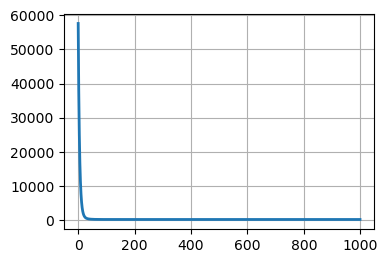

In [13]:
plt.figure(figsize=(4, 2.8))
plt.plot(J_hist, lw=2); plt.grid(True)

The scaled features get very accurate results **much, much faster!**. Notice the gradient of each parameter is tiny by the end of this fairly short run. A learning rate of 0.1 is a good start for regression with normalized features.
Let's plot our predictions versus the target values. Note, the prediction is made using the normalized feature while the plot is shown using the original feature values.

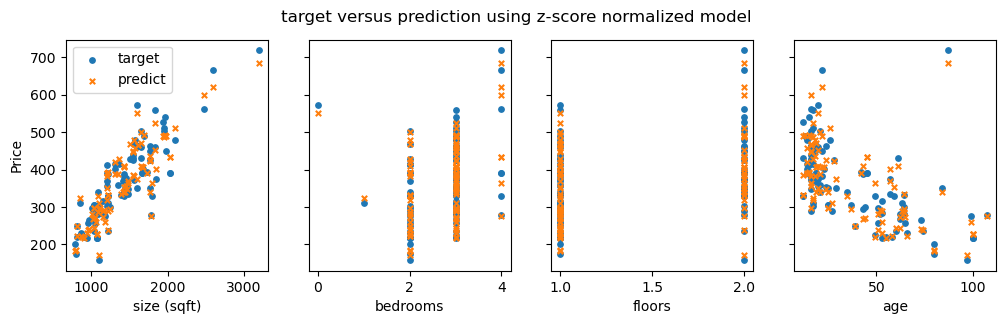

In [14]:
#predict target using normalized features
m = X_norm.shape[0]
y_predict = np.dot(X_norm, w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label = 'target', s=15)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_predict, label = 'predict', s=15, marker='x')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

The results look good. A few points to note:
- with multiple features, we can no longer have a single plot showing results versus features.
- when generating the plot, the normalized features were used. Any predictions using the parameters learned from a normalized training set must also be normalized.